In [101]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor,plot_tree

# Problem Statement

To Predict Boston House Price Using Given Data Apply Linear Regression,Decicion Tree, With Hyperparameter Tunning
and PRUNNING Decision Tree.

# Data Gathering

In [102]:
df=pd.read_csv('Boston_Dataset.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Exploratory Data Analysis

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  TARGET      506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [104]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We need to Drop 'Unnamed' column

Outliers present in
1. CRIM
2. ZN


In [105]:
df=df.drop('Unnamed: 0',axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# FEATURE ENGINEERING

# Checking Null values and Datatypes of Features

In [106]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

# Treating Outliers

<Axes: >

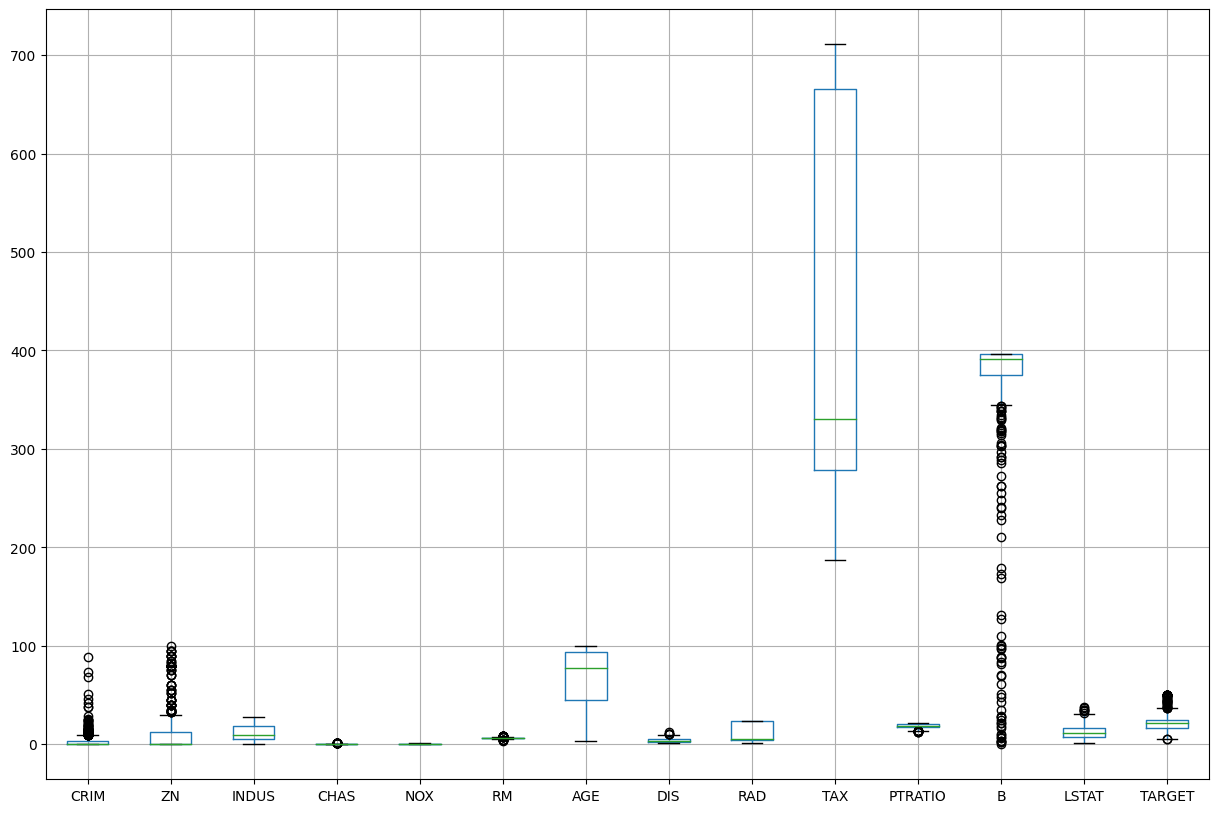

In [107]:
plt.figure(figsize=(15,10))
df.boxplot()# 

# 1. Treating CRIM Feature

<Axes: xlabel='CRIM'>

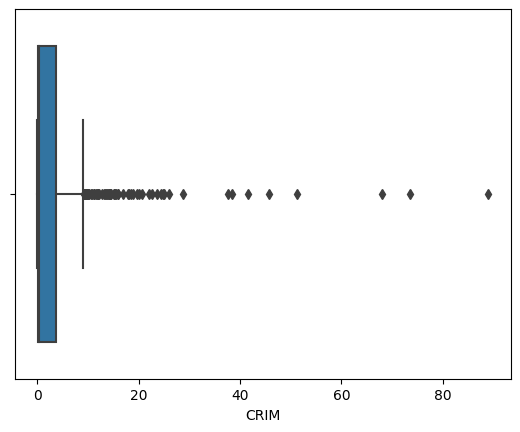

In [108]:
sns.boxplot(x = df["CRIM"])

# Treating Outliers Using IQR Method

In [109]:
q1 = df["CRIM"].quantile(0.25)
q2 = df["CRIM"].quantile(0.50)
q3 = df["CRIM"].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

upper_tail = q3 + 3 * iqr
lower_tail = q1 - 3 * iqr

print("UpperTail :",upper_tail)
print("Lower Tail : ",lower_tail)

IQR >>  3.5950375
UpperTail : 14.462195000000001
Lower Tail :  -10.7030675


# Imputing Upper tail

In [110]:
df["CRIM"] = np.where(df["CRIM"] > upper_tail,upper_tail,df["CRIM"])

<Axes: xlabel='CRIM'>

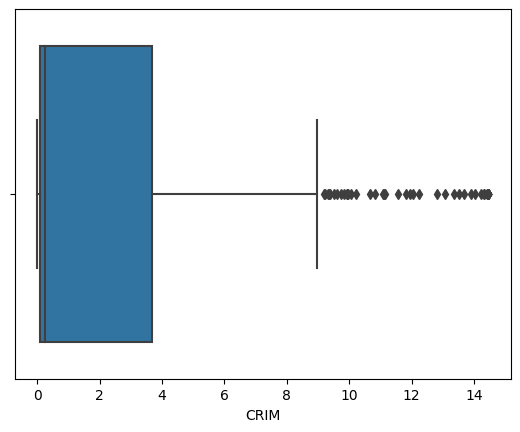

In [111]:
sns.boxplot(x = df["CRIM"])

# 2. Treating ZN Feature

<Axes: xlabel='ZN'>

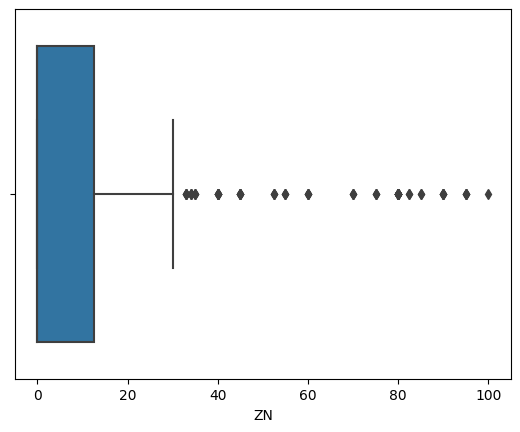

In [112]:
sns.boxplot(x = df["ZN"])

# Treating Outliers Using IQR Method

In [113]:
q1 = df["ZN"].quantile(0.25)
q2 = df["ZN"].quantile(0.50)
q3 = df["ZN"].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

upper_tail = q3 + 2 * iqr
lower_tail = q1 - 1.5 * iqr

print("UpperTail :",upper_tail)
print("Lower Tail : ",lower_tail)

IQR >>  12.5
UpperTail : 37.5
Lower Tail :  -18.75


# Imputing Upper tail

In [114]:
df["ZN"] = np.where(df["ZN"] > upper_tail,upper_tail,df["ZN"])

<Axes: xlabel='ZN'>

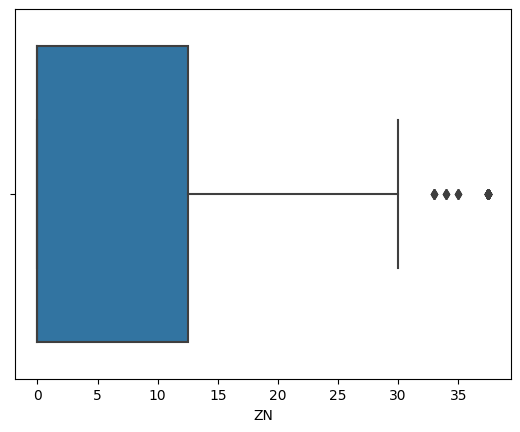

In [115]:
sns.boxplot(x = df["ZN"])

# Checking Linearity

In [116]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.332813,0.579908,-0.053139,0.605070,-0.280560,0.486606,-0.518734,0.872522,0.816263,0.397144,-0.498347,0.602029,-0.463781
ZN,-0.332813,1.000000,-0.580582,-0.034643,-0.550650,0.330549,-0.590833,0.683015,-0.342017,-0.371073,-0.429324,0.205038,-0.444728,0.374340
INDUS,0.579908,-0.580582,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.053139,-0.034643,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.605070,-0.550650,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.280560,0.330549,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.486606,-0.590833,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.518734,0.683015,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.872522,-0.342017,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.816263,-0.371073,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [117]:
df.var()

CRIM          19.946710
ZN           186.154386
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
TARGET        84.586724
dtype: float64

In [118]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TARGET'],
      dtype='object')

# Checking No Multicolinearity

In [119]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f'VIF of {df.columns[i]} is: ',vif)
    vif_list.append(vif)
    

VIF of CRIM is:  7.535930537488396
VIF of ZN is:  3.284556208108204
VIF of INDUS is:  14.525947052093603
VIF of CHAS is:  1.181634071815477
VIF of NOX is:  73.9133347161984
VIF of RM is:  137.4254397242946
VIF of AGE is:  21.395000272249533
VIF of DIS is:  15.673808144467502
VIF of RAD is:  20.490128034134248
VIF of TAX is:  59.98609938948368
VIF of PTRATIO is:  88.86874786530079
VIF of B is:  21.807477598352165
VIF of LSTAT is:  13.538484465816762


<Axes: >

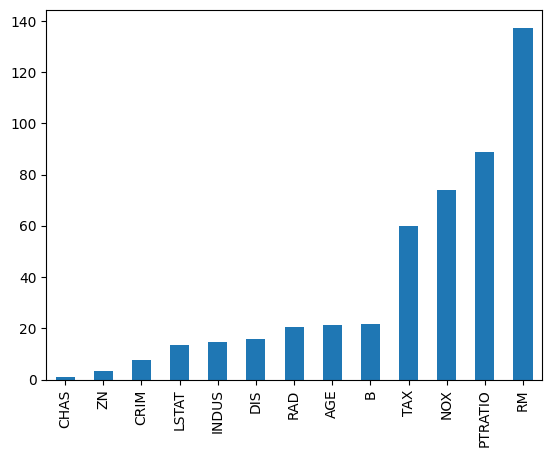

In [120]:
s1= pd.Series(vif_list,index=df.columns[:-1])
s1.sort_values().plot(kind='bar')

<Axes: >

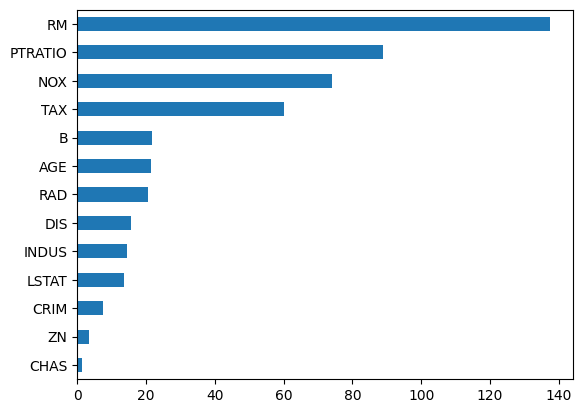

In [121]:
s1.sort_values().plot(kind='barh')

# Model Training

In [122]:
x=df.drop('TARGET',axis=1)
y=df['TARGET']

In [123]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [124]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

# Training on Linear Regression

In [125]:
linear_reg=LinearRegression()

In [126]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [127]:
linear_reg.coef_

array([-1.81314317e-01,  2.07545677e-02,  3.40337228e-02,  2.88159155e+00,
       -1.70033326e+01,  4.51378319e+00, -8.51084473e-03, -1.32061376e+00,
        2.53855654e-01, -8.96422073e-03, -9.67913565e-01,  1.25626375e-02,
       -5.00604280e-01])

In [128]:
linear_reg.intercept_

29.839788952258953

In [129]:
yp_train=linear_reg.predict(x_train)

In [130]:
yp_train[0:5]

array([10.22318626, 19.43404547, 23.37700068, 11.83383492, 18.28442392])

In [131]:
y_train[0:5]

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: TARGET, dtype: float64

# Evaluation Of Training Data

In [132]:
mse=mean_squared_error(y_train,yp_train)
print('MSE of taining data : ',mse)
rmse=np.sqrt(mse)
print('RMSE of taining data : ',rmse)
mae=mean_absolute_error(y_train,yp_train)
print('MAE of taining data : ',mae)
r2_sqaure=r2_score(y_train,yp_train)
print('R2 score of taining data : ',r2_sqaure)

MSE of taining data :  22.235026551760665
RMSE of taining data :  4.715403116570275
MAE of taining data :  3.344164241128678
R2 score of taining data :  0.7440525457651601


# Evaluation of Testing Data

In [133]:
yp_test=linear_reg.predict(x_test)

In [134]:
mse=mean_squared_error(y_test,yp_test)
print('MSE of testing data : ',mse)
print()
rmse=np.sqrt(mse)
print('RMSE of testing data : ',rmse)
print()
mae=mean_absolute_error(y_test,yp_test)
print('MAE of testing data : ',mae)
print()
r2_sqaured=r2_score(y_test,yp_test)
print('R2 score of testing data : ',r2_sqaured)
print()

MSE of testing data :  24.94662741984407

RMSE of testing data :  4.994659890307254

MAE of testing data :  3.2648531355633343

R2 score of testing data :  0.6598208036628148



# Applying Regularisation

# Lasso Regression

In [135]:
lasso_LR=Lasso()
lasso_LR.fit(x_train,y_train)

Lasso()

In [136]:
lasso_LR.score(x_train,y_train)

0.6882601425344654

In [137]:
yp_train=lasso_LR.predict(x_train)

In [138]:
lasso_LR=Lasso(alpha=2)
lasso_LR.fit(x_train,y_train)

Lasso(alpha=2)

In [139]:
lasso_LR.score(x_train,y_train)

0.6171455423246786

In [140]:
yp_train=lasso_LR.predict(x_train)

# Evaluation of Training Dataset for Lasso Regression

In [141]:
mse=mean_squared_error(y_train,yp_train)
print('MSE of taining data : ',mse)
rmse=np.sqrt(mse)
print('RMSE of taining data : ',rmse)
mae=mean_absolute_error(y_train,yp_train)
print('MAE of taining data : ',mae)
r2_sqaure=r2_score(y_train,yp_train)
print('R2 score of taining data : ',r2_sqaure)

MSE of taining data :  33.259869910876155
RMSE of taining data :  5.767137063645718
MAE of taining data :  4.121735222674709
R2 score of taining data :  0.6171455423246786


# Evaluation of Testing Dataset For Lasso Regression

In [142]:
yp_test=lasso_LR.predict(x_test)

In [143]:
mse=mean_squared_error(y_test,yp_test)
print('MSE of testing data : ',mse)
rmse=np.sqrt(mse)
print('RMSE of testing data : ',rmse)
mae=mean_absolute_error(y_test,yp_test)
print('MAE of testing data : ',mae)
r2_sqaured=r2_score(y_test,yp_test)
print('R2 score of testing data : ',r2_sqaured)

MSE of testing data :  28.990633739384105
RMSE of testing data :  5.38429510143938
MAE of testing data :  3.657909139876296
R2 score of testing data :  0.604675601202729


<Axes: >

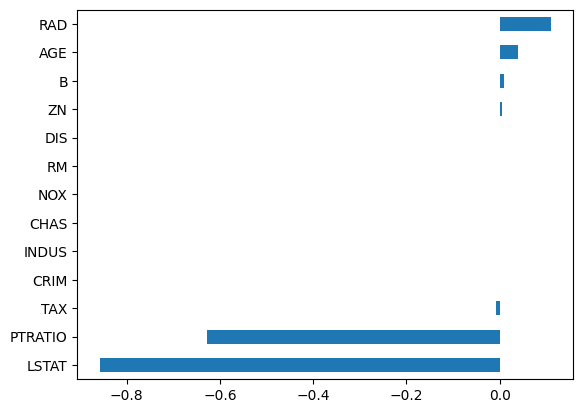

In [144]:
s1=pd.Series(lasso_LR.coef_,index=x.columns)
s1.sort_values().plot(kind='barh')

# 2. Ridge Regression

In [145]:
ridge_LR=Ridge(alpha=2)
ridge_LR.fit(x_train,y_train)

Ridge(alpha=2)

In [146]:
yp_train=ridge_LR.predict(x_train)


# Evaluation of Training Dataset For Ridge Regression

In [147]:
mse=mean_squared_error(y_train,yp_train)
print('MSE of taining data : ',mse)
rmse=np.sqrt(mse)
print('RMSE of taining data : ',rmse)
mae=mean_absolute_error(y_train,yp_train)
print('MAE of taining data : ',mae)
r2_sqaure=r2_score(y_train,yp_train)
print('R2 score of taining data : ',r2_sqaure)

MSE of taining data :  22.578930046504954
RMSE of taining data :  4.751729163841827
MAE of taining data :  3.3361081010206846
R2 score of taining data :  0.7400938716535119


# Evaluation of Testing Dataset For Ridge Regression

In [148]:
yp_test=ridge_LR.predict(x_test)

In [149]:
mse=mean_squared_error(y_test,yp_test)
print('MSE of testing data : ',mse)
rmse=np.sqrt(mse)
print('RMSE of testing data : ',rmse)
mae=mean_absolute_error(y_test,yp_test)
print('MAE of testing data : ',mae)
r2_sqaured=r2_score(y_test,yp_test)
print('R2 score of testing data : ',r2_sqaured)

MSE of testing data :  25.245186827267307
RMSE of testing data :  5.02445885914765
MAE of testing data :  3.1689362368213114
R2 score of testing data :  0.6557495639891364


<Axes: >

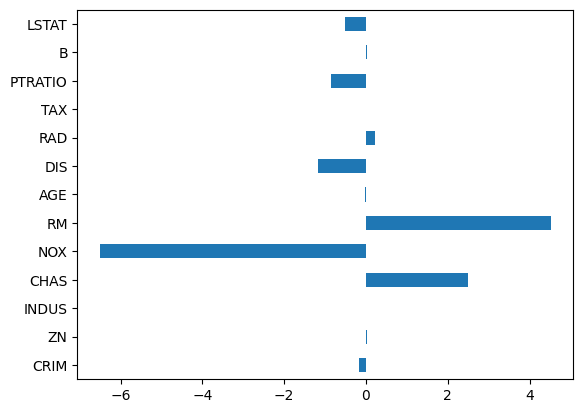

In [150]:
s1=pd.Series(ridge_LR.coef_,index=x.columns)
s1.plot(kind='barh')

# Applying HyperParameters For Lasso & Ridge Regression

# Finding the Best Estimator using gscv

In [151]:
lasso_GSLR=Lasso()
hyperparameters = {'alpha':np.arange(0.01,5,0.01)}
gscv_lasso=GridSearchCV(lasso_GSLR,hyperparameters,cv=5)
gscv_lasso.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [152]:
gscv_lasso.best_estimator_

Lasso(alpha=0.01)

# Applying Lasso with the Best Estimator

In [153]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train,y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,y_pred_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 22.27200583652309

Root Mean Squared Error : 4.719322603565377

Mean Absolute Error : 3.3286701602177557

R Squared Value :  0.7436268771124902


In [154]:

#Testing Data Evaluation

y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_test,y_pred)
print("R Squared Value : ",r_squared)

Mean Squared Error : 24.955728255710866

Root Mean Squared Error : 4.99557086384638

Mean Absolute Error : 3.2286354408601547

R Squared Value :  0.6596967021167797


# Applying Ridge with the Best Estimator

In [155]:
Ridge_model=Ridge(alpha= 0.01)
Ridge_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [156]:
yp_train = Ridge_model.predict(x_train)

mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 22.235083528684175

Root Mean Squared Error : 4.7154091581414415

Mean Absolute Error : 3.3434637771359608

R Squared Value :  0.7440518899036306


In [157]:
yp_test= Ridge_model.predict(x_test)
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 24.947023533854644
RMSE; 4.994699543901979
MAE: 3.2634397854210904
R2_Score: 0.6598154021412581


# Model Buliding on Decision Tree Without Hyperparameter Tuning

In [158]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

# Evaluation Of Training dataset

In [159]:
yp_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 0.0

Root Mean Squared Error : 0.0

Mean Absolute Error : 0.0

R Squared Value :  1.0


# Evaluation Of Testing dataset

In [160]:
yp_test= dt_reg.predict(x_test)
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 9.690196078431374
RMSE : 3.1129079778289905
MAE: 2.298039215686275
R2_Score: 0.8678617731033106


# Decision Tree Model With Hyperparameter Tuning

In [161]:
dt_reg = DecisionTreeRegressor()

hyperparameter = {"criterion" :['squared_error','absolute_error'],
                 'max_depth': np.arange(3,8),
                 "min_samples_split" :np.arange(2,20),
                 "min_samples_leaf":np.arange(2,15)}
                  
                  
gscv_dt_reg = GridSearchCV(dt_reg,hyperparameter,cv=5)    
gscv_dt_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [162]:
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=5, min_samples_split=18)

In [163]:
gscv_dt_reg.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 18}

# Evaluation Of Training dataset For Hyperparameters 

In [164]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=5, min_samples_split=18)

In [165]:
yp_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 13.921819306930693

Root Mean Squared Error : 3.7311954259902675

Mean Absolute Error : 2.0492574257425744

R Squared Value :  0.8397458981381698


# Evaluation Of Testing dataset For Hyperparameters

In [166]:
yp_test= dt_reg.predict(x_test)
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 22.01921568627451
RMSE; 4.692463711769598
MAE: 2.9205882352941175
R2_Score: 0.6997398097117681


# Building DT Model for Regression Using Pruning

In [167]:
decision_tree_Model = DecisionTreeRegressor(random_state=10)
decision_tree_Model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [168]:
result = decision_tree_Model.cost_complexity_pruning_path(x_train,y_train) 
result["ccp_alphas"]

array([0.00000000e+00, 1.40701532e-16, 5.62806127e-16, 5.62806127e-16,
       1.12561225e-15, 1.12561225e-15, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.65016502e-05, 1.65016502e-05, 3.71287129e-05, 3.71287129e-05,
       3.71287129e-05, 3.71287129e-05, 3.71287129e-05, 3.71287129e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 6.60066007e-05,
      

In [169]:
ccp_alpha_list = result["ccp_alphas"]
ccp_alpha_list


array([0.00000000e+00, 1.40701532e-16, 5.62806127e-16, 5.62806127e-16,
       1.12561225e-15, 1.12561225e-15, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.65016502e-05, 1.65016502e-05, 3.71287129e-05, 3.71287129e-05,
       3.71287129e-05, 3.71287129e-05, 3.71287129e-05, 3.71287129e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 6.60066007e-05,
      

In [170]:
len(ccp_alpha_list)

361

# Calculating Training & Testing Accuracy For each ccp_alpha value 

In [171]:
train_accuracy_list = []
test_accuracy_list  = []

for ccp_alpha in ccp_alpha_list:

    decision_tree_Model = DecisionTreeRegressor(random_state=10,ccp_alpha = ccp_alpha)
    decision_tree_Model.fit(x_train,y_train)
    train_accuracy_list.append(decision_tree_Model.score(x_train,y_train)) # Training Accuracy
    test_accuracy_list.append(decision_tree_Model.score(x_test,y_test))    # Testing Accuracy
    
    
print(train_accuracy_list)
print('*'*125)
print('*'*125)
print('*'*125)
print(test_accuracy_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999997150741866, 0.9999997150741866, 0.9999992876854665, 0.9999992876854665, 0.9999992876854665, 0.9999991452225598, 0.9999990027596531, 0.9999988602967466, 0.9999985753709332, 0.9999985753709332, 0.9999984329080265, 0.9999974356676796, 0.9999974356676796, 0.9999974356676796, 0.9999974356676796, 0.9999974356676796, 0.9999974356676796, 0.9999974356676796, 0.9999972932047729, 0.999996865816053, 0.999996865816053, 0.999996865816053, 0.9999967233531463, 0.9999965808902396, 0.9999961535015195, 0.9999961535015195, 0.9999961535015195, 0.9999960110386128, 0.9999958685757061, 0.9999957261127994, 0.9999955361622571, 0.9999953462117149, 0.9999949188229948, 0.9999944914342748, 0.9999940640455548, 0.9999936366568347, 0.9999932092681146, 0.9999927818793946, 0.9999922120277678, 0.9999916421761411, 0.9999910723245143, 0.9999905024728876, 0.9999893627696341, 0.9999893627696341, 0.9999882230663806, 0.9999882230663806, 0.9999876532147539, 0.9999870833631271, 0.9999865135

# Visualising Best Training & Testing Accuracy After Pruning DT

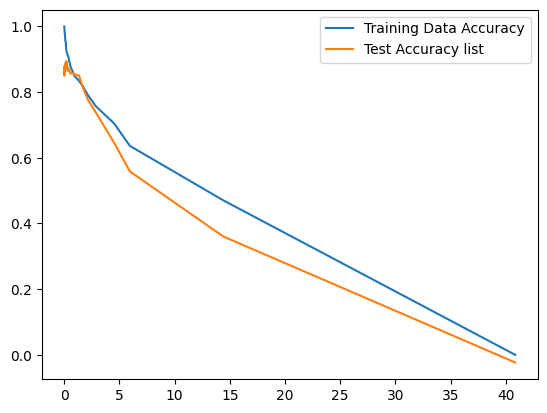

In [172]:
fig,ax  = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy_list,label = "Training Data Accuracy")
ax.plot(ccp_alpha_list,test_accuracy_list,label = "Test Accuracy list")
ax.legend()

In [173]:
best_test_accuracy = np.where(test_accuracy_list == np.max(test_accuracy_list)) # Best Accuracy at 340th Index
best_test_accuracy

(array([337], dtype=int64),)

In [174]:
best_test_accuracy[0][0]

337

In [175]:
test_accuracy_list[best_test_accuracy[0][0]]

0.8941754942500152

In [176]:
train_accuracy_list[best_test_accuracy[0][0]]

0.9319963187121696

In [177]:
best_ccp = ccp_alpha_list[best_test_accuracy[0][0]] #---Best ccp value
best_ccp 

0.17329304180417898

In [178]:
decision_tree_Model = DecisionTreeRegressor(random_state=10, ccp_alpha=best_ccp)
decision_tree_Model.fit(x_train,y_train)



DecisionTreeRegressor(ccp_alpha=0.17329304180417898, random_state=10)

# Training Accuracy With Pruning Decision Tree

In [179]:
yp_train = decision_tree_Model.predict(x_train)

mse = mean_squared_error(y_train,yp_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,yp_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,yp_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 5.907711266645432

Root Mean Squared Error : 2.4305783810948025

Mean Absolute Error : 1.8701317805001105

R Squared Value :  0.9319963187121696


# Testing Accuracy With Pruning Decision Tree

In [180]:
yp_test= decision_tree_Model.predict(x_test)
mse = mean_squared_error(y_test,yp_test)
print("MSE:",mse)

rmse = np.sqrt(mse)
print("RMSE;",rmse)

mae = mean_absolute_error(y_test,yp_test)
print("MAE:",mae)

r2 = r2_score(y_test,yp_test)
print("R2_Score:",r2)

MSE: 7.760511357717735
RMSE; 2.7857694372861754
MAE: 2.0900176439971703
R2_Score: 0.8941754942500152


# Evaluation Of Linear regression,Lasso, Ridge,DT & DT with Pruning Algorithm

In [181]:
Training_Result = pd.DataFrame({'Linear Regression': [22.2350,4.7154,3.3441,0.7440],
                                'Lasso Regression' : [22.2720,4.7193,3.3286,0.74362],
                                'Ridge Regression' : [22.2350,4.7154,3.3434,0.7440],
                                'DT Without HypParams': [0.0,0.0,0.0,1.0],
                                'DT With HyperParams':[13.9218,3.7311,2.0492,0.8397],
                                'DT With Pruning' : [5.9077,2.4305,1.8701,0.9319],
                               }
                                ,index=['MSE','RMSE','MAE','R2_Score'])
Training_Result


,Linear Regression,Lasso Regression,Ridge Regression,DT Without HypParams,DT With HyperParams,DT With Pruning
MSE,22.2350,22.27200,22.2350,0.0,13.9218,5.9077
RMSE,4.7154,4.71930,4.7154,0.0,3.7311,2.4305
MAE,3.3441,3.32860,3.3434,0.0,2.0492,1.8701
R2_Score,0.7440,0.74362,0.7440,1.0,0.8397,0.9319


In [182]:
Testing_Result = pd.DataFrame({'Linear Regression':     [28.9906,5.3842,3.6579,0.6046],
                                'Lasso Regression' :    [24.9557,4.9955,3.2286,0.6596],
                                'Ridge Regression' :    [24.9470,4.9946,3.2634,0.6598],
                                'DT Without HypParams': [22.9059,4.7860,2.8009,0.6876],
                                'DT With HyperParams':  [22.0192,4.6924,2.9205,0.6997],
                                'DT with Pruning':      [7.7605,2.7857,2.0900,0.8941]}
                                ,index=['MSE','RMSE','MAE','R2_Score'])
Testing_Result


,Linear Regression,Lasso Regression,Ridge Regression,DT Without HypParams,DT With HyperParams,DT with Pruning
MSE,28.9906,24.9557,24.947027,22.9059,22.0192,7.7605
RMSE,5.3842,4.9955,4.994600,4.7860,4.6924,2.7857
MAE,3.6579,3.2286,3.263400,2.8009,2.9205,2.0900
R2_Score,0.6046,0.6596,0.659800,0.6876,0.6997,0.8941
